In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')
print(df.head())

   engine_displacement  num_cylinders  horsepower  vehicle_weight  \
0                  170            3.0       159.0     3413.433759   
1                  130            5.0        97.0     3149.664934   
2                  170            NaN        78.0     3079.038997   
3                  220            4.0         NaN     2542.392402   
4                  210            1.0       140.0     3460.870990   

   acceleration  model_year  origin fuel_type         drivetrain  num_doors  \
0          17.7        2003  Europe  Gasoline    All-wheel drive        0.0   
1          17.8        2007     USA  Gasoline  Front-wheel drive        0.0   
2          15.1        2018  Europe  Gasoline  Front-wheel drive        0.0   
3          20.2        2009     USA    Diesel    All-wheel drive        2.0   
4          14.4        2009  Europe  Gasoline    All-wheel drive        2.0   

   fuel_efficiency_mpg  
0            13.231729  
1            13.688217  
2            14.246341  
3         

In [2]:
print(df.isnull().sum())

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64


In [3]:
print(df['horsepower'].median())

149.0


0    152.0
Name: horsepower, dtype: float64


<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

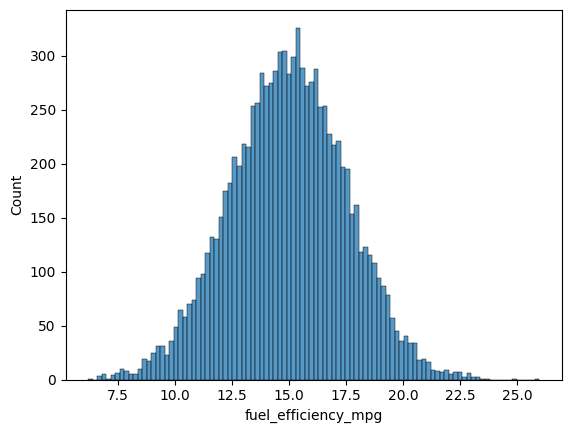

In [4]:
print(df['horsepower'].mode())

import seaborn as sns
sns.histplot(df.fuel_efficiency_mpg, bins = 100)

In [5]:
df1 = df.drop(['num_cylinders', 'acceleration', 'origin', 'fuel_type', 'drivetrain', 'num_doors'], axis = 1)
print(df1.head())

   engine_displacement  horsepower  vehicle_weight  model_year  \
0                  170       159.0     3413.433759        2003   
1                  130        97.0     3149.664934        2007   
2                  170        78.0     3079.038997        2018   
3                  220         NaN     2542.392402        2009   
4                  210       140.0     3460.870990        2009   

   fuel_efficiency_mpg  
0            13.231729  
1            13.688217  
2            14.246341  
3            16.912736  
4            12.488369  


In [6]:
n = len(df1)

In [7]:
print(n)


9704


In [8]:
n_train = int(n*0.6)
n_val = int(n*0.2)
n_test = n - n_train - n_val
print(n_train, n_val, n_test)

5822 1940 1942


In [9]:
print(1940+1942+5822)

9704


In [10]:
#shuffling the data
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
df_train = df1.iloc[idx[:n_train]]
df_val = df1.iloc[idx[n_train:n_train + n_val]]
df_test = df1.iloc[idx[n_train + n_val:]]
print(df_train)

      engine_displacement  horsepower  vehicle_weight  model_year  \
483                   220       144.0     2535.887591        2009   
7506                  160       141.0     2741.170484        2019   
8795                  230       155.0     2471.880237        2017   
1688                  150       206.0     3748.164469        2015   
6217                  300       111.0     2135.716359        2006   
...                   ...         ...             ...         ...   
8387                  160       111.0     3038.134712        2002   
7331                  160       157.0     2877.624938        2006   
1696                  260       139.0     2606.972984        2009   
5685                  280       132.0     4004.214323        2014   
6735                  210       152.0     2500.175687        2020   

      fuel_efficiency_mpg  
483             16.642943  
7506            16.298377  
8795            18.591822  
1688            11.818843  
6217            19.402209  
...

In [11]:
print(len(df_train))

5822


In [12]:
print(len(df_val))

1940


In [13]:
print(len(df_test))

1942


In [14]:
#mean of training dataset
print(df_train['horsepower'].mean())

149.54348229185982


In [15]:
#2 preparing 2 sets of data training with o/mean
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values
print(y_test)
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

[13.73334321 15.81604972 15.80435416 ... 18.40443466 20.50246014
 16.81624056]


In [16]:
df_train_zero = df_train.fillna(0)
df_train_mean = df_train.fillna(149.5)


In [17]:
# linear regression for a dataset with mean instead NA
X = df_train_mean.values
y = y_train
print(X)

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    print(w_full[0], w_full[1:])
    return w_full[0], w_full[1:]

w0, w = train_linear_regression(X, y)

[[ 220.          144.         2535.88759124 2009.        ]
 [ 160.          141.         2741.17048439 2019.        ]
 [ 230.          155.         2471.88023726 2017.        ]
 ...
 [ 260.          139.         2606.9729844  2009.        ]
 [ 280.          132.         4004.21432295 2014.        ]
 [ 210.          152.         2500.17568746 2020.        ]]
28.90708839767159 [ 0.00012036  0.01030283 -0.00500996 -0.00022572]


<Axes: ylabel='Count'>

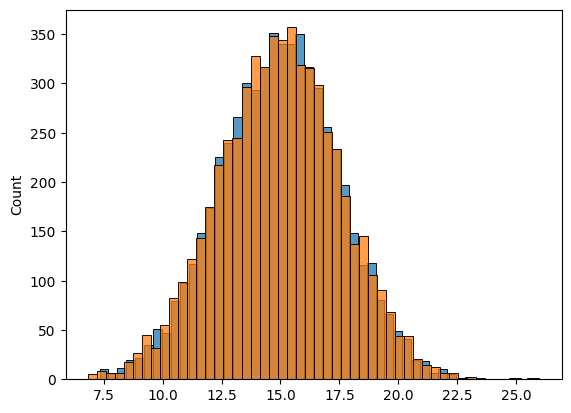

In [18]:
y_pred = w0 + X.dot(w)

sns.histplot(y_pred)
sns.histplot(y_train)


[[ 220.          144.         2535.88759124 2009.        ]
 [ 160.          141.         2741.17048439 2019.        ]
 [ 230.          155.         2471.88023726 2017.        ]
 ...
 [ 260.          139.         2606.9729844  2009.        ]
 [ 280.          132.         4004.21432295 2014.        ]
 [ 210.          152.         2500.17568746 2020.        ]] [16.64294342 16.29837715 18.59182197 ... 16.96405425 10.05909406
 17.59323665]
28.810749330744027 [ 9.88022381e-05  3.54195814e-03 -5.01316573e-03  3.51135284e-04]


<Axes: ylabel='Count'>

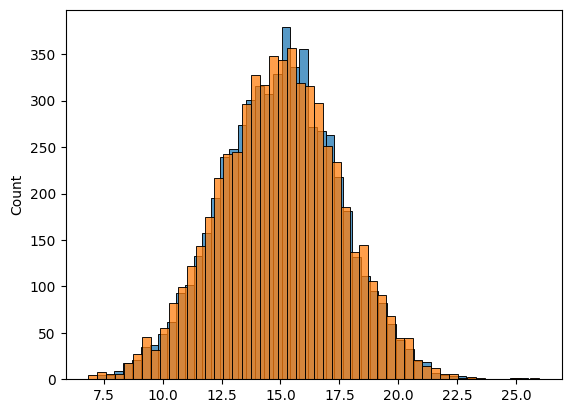

In [19]:
# linear regression for a dataset with zero instead NA
X = df_train_zero.values
y = y_train
print(X, y)

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    print(w_full[0], w_full[1:])
    return w_full[0], w_full[1:]

w0, w = train_linear_regression(X, y)

y_pred_zero = w0 + X.dot(w)

sns.histplot(y_pred_zero)
sns.histplot(y_train)

In [20]:
#RSME asses:
def rmse(y, i):	
    error = y-i
    se = error ** 2
    mse = se.mean()
    result = round(np.sqrt(mse), 2)
    print(result)
    return result
    
rmse(y_train, y_pred)


0.46


np.float64(0.46)

In [21]:
rmse(y_train, y_pred_zero)

0.52


np.float64(0.52)

In [22]:
# Validating the quality of models with validating dataset
X_val_zero = df_val.fillna(0).values
y = y_val
w0, w = train_linear_regression(X_val_zero, y)
y_pred_zero = w0 + X_val_zero.dot(w)
rmse(y, y_pred_zero)

X_val_mean = df_val.fillna(149.5).values
y = y_val
w0, w = train_linear_regression(X_val_mean, y)
y_pred_mean = w0 + X_val_zero.dot(w)
rmse(y, y_pred_mean)

23.79451263937277 [ 0.00012332  0.00394721 -0.00501617  0.00281849]
0.52
24.66010464837413 [ 0.00029699  0.0099542  -0.00502625  0.0019172 ]
0.6


np.float64(0.6)

In [23]:
#Comparing different coefficients of normalisation:

X = X_val_zero
y = y_val
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X) + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]
print(X, y)

def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

for r in [0, 0.01, 0.1, 1, 5, 10, 100]: 
    w0, w = train_linear_regression_reg(X, y, r)
    y_pred_reg = w0 + X.dot(w)
    score = rmse(y_val, y_pred_reg)
    print(r, score)


    


[[ 250.          154.         2254.31324473 2002.        ]
 [ 210.          152.         2435.20360628 2004.        ]
 [ 180.          112.         2772.13441008 2020.        ]
 ...
 [ 290.          205.         3403.40149596 2019.        ]
 [ 200.          159.         2752.51603879 2009.        ]
 [ 230.          202.         3303.00068812 2008.        ]] [18.92574819 17.96528447 15.36634109 ... 13.86860675 15.66540251
 13.61312692]
0.52
0 0.52
0.52
0.01 0.52
0.52
0.1 0.52
0.52
1 0.52
0.52
5 0.52
0.52
10 0.52
0.52
100 0.52


In [27]:
# evaluating using different seeds
accuracy = [0]
for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    idx = np.arange(n)
    np.random.seed(i)
    np.random.shuffle(idx)
    df_train = df1.iloc[idx[:n_train]]
    df_val = df1.iloc[idx[n_train:n_train + n_val]]
    df_test = df1.iloc[idx[n_train + n_val:]]
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values
    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']
    X_train = df_train.fillna(0).values
    X_val = df_val.fillna(0).values
    X_test = df_test.fillna(0).values
    w0, w = train_linear_regression(X_train, y_train)
    y_pred = w0 + X_val.dot(w)
    accuracy = rmse(y_val, y_pred)
    print(accuracy)

27.329325146630893 [ 0.00017705  0.00371137 -0.00499983  0.00104937]
0.52
0.52
28.940064356364505 [ 9.58942447e-05  3.52278376e-03 -5.01880453e-03  2.98213836e-04]
0.52
0.52
25.857415151532642 [ 0.00015527  0.00379238 -0.00500626  0.00179045]
0.52
0.52
28.073015756355787 [ 0.00018176  0.00372564 -0.00500868  0.00068943]
0.52
0.52
25.959601824269935 [ 0.00020078  0.00352086 -0.00502021  0.0017747 ]
0.51
0.51
25.834054960255436 [-1.01133833e-05  3.81073710e-03 -5.02002146e-03  1.83781534e-03]
0.53
0.53
25.90166501427251 [ 5.55863827e-05  3.54605148e-03 -5.01000423e-03  1.79855023e-03]
0.53
0.53
28.409009905941055 [ 0.00012985  0.00332396 -0.005014    0.00056618]
0.51
0.51
26.458277400017874 [ 0.00022968  0.0037876  -0.0050198   0.00150636]
0.51
0.51
27.505863975924473 [-7.31019984e-05  3.51240276e-03 -5.02050047e-03  1.03311687e-03]
0.51
0.51


In [29]:
result = round(np.std(accuracy), 3)
print(result)

0.0


In [30]:
print(np.std(accuracy))

0.0
